In [1]:
print("Multimedia Security Experiment 6")

Multimedia Security Experiment 6


In [2]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import myipf
#from mpl_toolkits.mplot3d.axes3d import Axes3D

%matplotlib inline
plt.rcParams["font.sans-serif"] = ["SimHei"] # 用来正常显示中文
plt.rcParams["axes.unicode_minus"]=False # 用来正常显示负号
%config InlineBackend.figure_format = "svg"

In [3]:
img = plt.imread("standard_test_images/lena_gray_512.tif")

In [4]:
gn = myipf.gasussNoise(img)
pn = myipf.pepperNoise(img)

## 1.滤波器
方便起见，采用距离最近的值的作为外边，一般不会出现明显的黑框。  
均匀滤波对去除高斯噪声有很好的效果，因为高斯噪声均值是确定的，但对椒盐噪声效果不好;  
中值滤波对去除椒盐噪声有更好的效果，对高斯噪声也有一定效果，可能是我高斯噪声没弄好。

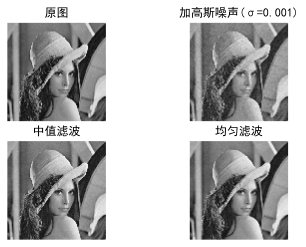

原图与加噪图像的信噪比
均方差： 49.631439208984375
峰值信噪比： 31.173234918471397
原图与中值滤波图像的信噪比
均方差： 25.172035217285156
峰值信噪比： 34.12162030186316
原图与均匀滤波图像的信噪比
均方差： 23.99193572998047
峰值信噪比： 34.3301507151058


In [5]:
fM = myipf.filters(gn, "M", 3)
fA = myipf.filters(gn, "A", 3)
plt.subplot(221), plt.imshow(img, cmap="gray"), plt.title("原图"), plt.axis("off")
plt.subplot(222), plt.imshow(gn, cmap="gray"), plt.title("加高斯噪声(σ=0.001)"), plt.axis("off")
plt.subplot(223), plt.imshow(fM, cmap="gray"), plt.title("中值滤波"), plt.axis("off")
plt.subplot(224), plt.imshow(fA, cmap="gray"), plt.title("均匀滤波"), plt.axis("off")
plt.show()
print("原图与加噪图像的信噪比")
myipf.calcMSEPSNR(img, gn)
print("原图与中值滤波图像的信噪比")
myipf.calcMSEPSNR(img, fM)
print("原图与均匀滤波图像的信噪比")
myipf.calcMSEPSNR(img, fA)

### 
增大了方差，模板大小增大到5×5，均匀滤波的效果比中值好一点，优势不明显；模板增大到7×7效果更好一点，但再往上效果就不好了。

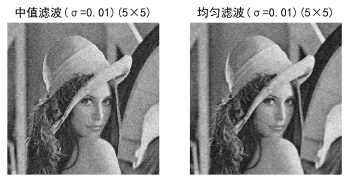

原图与中值滤波图像的信噪比
均方差： 66.73896408081055
峰值信噪比： 29.887008995961736
原图与均匀滤波图像的信噪比
均方差： 62.024879455566406
峰值信噪比： 30.2051443196773


In [6]:
gn = myipf.gasussNoise(img, sigma=0.01)
fM = myipf.filters(gn, "M", 3)
fA = myipf.filters(gn, "AG", 3)
plt.subplot(121), plt.imshow(fM, cmap="gray"), plt.title("中值滤波(σ=0.01)(5×5)"), plt.axis("off")
plt.subplot(122), plt.imshow(fA, cmap="gray"), plt.title("均匀滤波(σ=0.01)(5×5)"), plt.axis("off")
plt.show()
print("原图与中值滤波图像的信噪比")
myipf.calcMSEPSNR(img, fM)
print("原图与均匀滤波图像的信噪比")
myipf.calcMSEPSNR(img, fA)

### 
可以看到，均匀滤波会导致图像变得模糊，如果一直增大模板大小，虽然能去除高斯噪声，但图像细节也会丢失，所以PSNR反而降低。

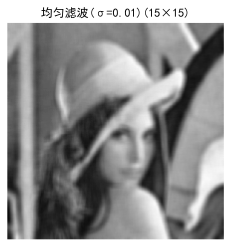

原图与均匀滤波图像的信噪比
均方差： 52.45345687866211
峰值信噪比： 30.933062457672044


In [7]:
fA = myipf.filters(gn, "A", 15)
plt.subplot(111), plt.imshow(fA, cmap="gray"), plt.title("均匀滤波(σ=0.01)(15×15)"), plt.axis("off")
plt.show()
print("原图与均匀滤波图像的信噪比")
myipf.calcMSEPSNR(img, fA)

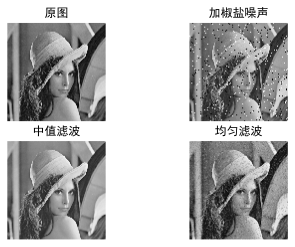

原图与加噪图像的信噪比
均方差： 5.149974822998047
峰值信噪比： 41.01275254983952
原图与中值滤波图像的信噪比
均方差： 13.168071746826172
峰值信噪比： 36.93558176720416
原图与均匀滤波图像的信噪比
均方差： 47.2401237487793
峰值信噪比： 31.387693342604383


In [8]:
fM = myipf.filters(pn, "M", 3)
fA = myipf.filters(pn, "A", 3)
plt.subplot(221), plt.imshow(img, cmap="gray"), plt.title("原图"), plt.axis("off")
plt.subplot(222), plt.imshow(pn, cmap="gray"), plt.title("加椒盐噪声"), plt.axis("off")
plt.subplot(223), plt.imshow(fM, cmap="gray"), plt.title("中值滤波"), plt.axis("off")
plt.subplot(224), plt.imshow(fA, cmap="gray"), plt.title("均匀滤波"), plt.axis("off")
plt.show()
print("原图与加噪图像的信噪比")
myipf.calcMSEPSNR(img, pn)
print("原图与中值滤波图像的信噪比")
myipf.calcMSEPSNR(img, fM)
print("原图与均匀滤波图像的信噪比")
myipf.calcMSEPSNR(img, fA)

### 
中值滤波也会导致图像模糊，同时图像会更平滑。

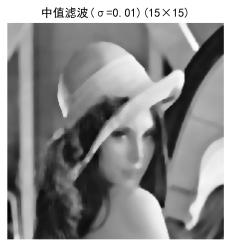

原图与中值滤波图像的信噪比
均方差： 37.10099411010742
峰值信噪比： 32.43694814305429


In [9]:
fA = myipf.filters(pn, "M", 15)
plt.subplot(111), plt.imshow(fA, cmap="gray"), plt.title("中值滤波(σ=0.01)(15×15)"), plt.axis("off")
plt.show()
print("原图与中值滤波图像的信噪比")
myipf.calcMSEPSNR(img, fA)

## 2.锐化滤波及边缘检测
锐化根据拉普拉斯模板可知是把中间的像素突出，会增白轮廓边界，八联通的模块效果没有四联通的好，拉普拉斯会导致像素值溢出，我没有处理好溢出情况，大于255置为255，小于0置为0，没有找到一种好的处理方法。

In [10]:
img2 = plt.imread("standard_test_images/cameraman.tif")
fL1 = myipf.filters(img2, "L1", 3) # 八联通
fL2 = myipf.filters(img2, "L2", 3) # 四联通
fS  = myipf.filters(img2, "S", 3)

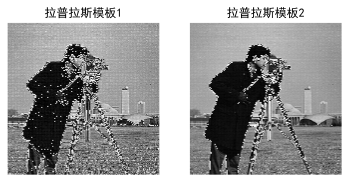

In [11]:
plt.subplot(121), plt.imshow(fL1, cmap="gray"), plt.title("拉普拉斯模板1"), plt.axis("off")
plt.subplot(122), plt.imshow(fL2, cmap="gray"), plt.title("拉普拉斯模板2"), plt.axis("off")
plt.show()

### 
sobel算子滤波后图像可以很方便的图像二值化了，轮廓边缘清晰可见，这种梯度锐化从sobel模板来看是根据两侧像素来实现边缘检测的，两边相差越大的地方可能存在轮廓，这种轮廓锐化后会被突出，而且进行了x方向和y方向的计算，最后平方和开根号。

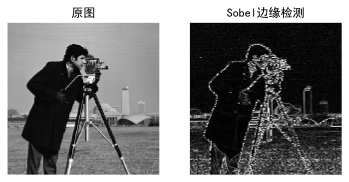

In [12]:
plt.subplot(121), plt.imshow(img2, cmap="gray"), plt.title("原图"), plt.axis("off")
plt.subplot(122), plt.imshow(fS,  cmap="gray"), plt.title("Sobel边缘检测"), plt.axis("off")
plt.show()